In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding ,Bidirectional, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('/content/swiggy.csv')
print("Columns in the dataset:")
print(data.columns.tolist())

Columns in the dataset:
['ID', 'Area', 'City', 'Restaurant Price', 'Avg Rating', 'Total Rating', 'Food Item', 'Food Type', 'Delivery Time', 'Review']


In [3]:
data.head()

,ID,Area,City,Restaurant Price,Avg Rating,Total Rating,Food Item,Food Type,Delivery Time,Review
0,1,Suburb,Ahmedabad,600,4.2,6198,Sushi,Fast Food,30-40 min,"Good, but nothing extraordinary."
1,2,Business District,Pune,200,4.7,4865,Pepperoni Pizza,Non-Vegetarian,50-60 min,"Good, but nothing extraordinary."
2,3,Suburb,Bangalore,600,4.7,2095,Waffles,Fast Food,50-60 min,Late delivery ruined it.
3,4,Business District,Mumbai,900,4.0,6639,Sushi,Vegetarian,50-60 min,Best meal I've had in a while!
4,5,Tech Park,Mumbai,200,4.7,6926,Spring Rolls,Gluten-Free,20-30 min,Mediocre experience.


In [4]:
data.shape

(8000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8000 non-null   int64  
 1   Area              8000 non-null   object 
 2   City              8000 non-null   object 
 3   Restaurant Price  8000 non-null   int64  
 4   Avg Rating        8000 non-null   float64
 5   Total Rating      8000 non-null   int64  
 6   Food Item         8000 non-null   object 
 7   Food Type         8000 non-null   object 
 8   Delivery Time     8000 non-null   object 
 9   Review            8000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 625.1+ KB


In [6]:
data.isnull().sum()

,0
ID,0
Area,0
City,0
Restaurant Price,0
Avg Rating,0
Total Rating,0
Food Item,0
Food Type,0
Delivery Time,0
Review,0


In [7]:
data.describe()

,ID,Restaurant Price,Avg Rating,Total Rating
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,544.587500,4.129900,4979.977500
std,2309.54541,287.968871,0.645791,2877.285148
min,1.00000,100.000000,3.000000,51.000000
25%,2000.75000,300.000000,3.500000,2476.000000
50%,4000.50000,500.000000,4.200000,4989.500000
75%,6000.25000,800.000000,4.700000,7498.000000
max,8000.00000,1000.000000,5.000000,10000.000000


In [8]:
data['Avg Rating'].value_counts()

,count
Avg Rating,
4.0,1169
5.0,1161
3.0,1143
4.7,1138
4.2,1133
3.5,1130
4.5,1126


In [9]:
data['Review'][100]

'Would order again if needed.'

In [10]:
max_len_ = 0
for review in data['Review']:
    max_len_ = max(len(review), max_len_)
print(max_len_)

35


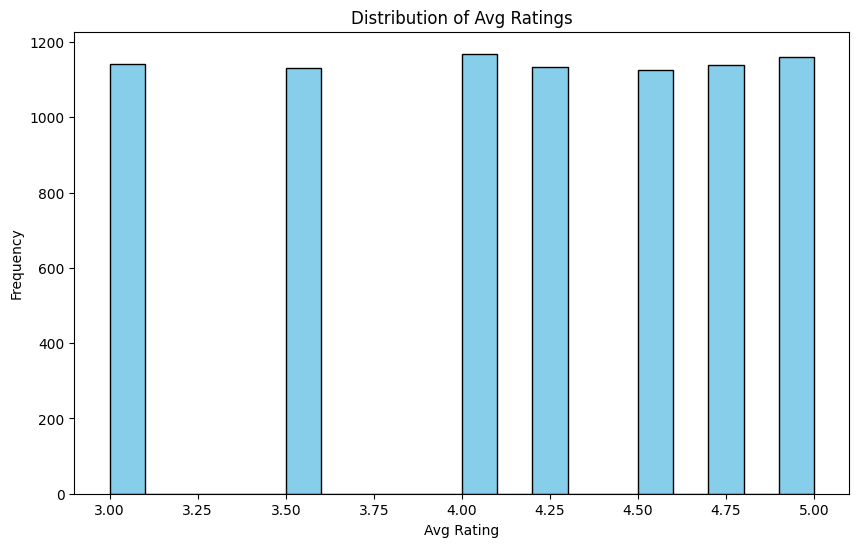

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['Avg Rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Avg Ratings')
plt.xlabel('Avg Rating')
plt.ylabel('Frequency')
plt.show()

In [12]:
data["Review"] = data["Review"].str.lower()
data["Review"] = data["Review"].replace(r'[^a-z0-9\s]', '', regex=True)

data['sentiment'] = data['Avg Rating'].apply(lambda x: 1 if x > 3.5 else 0)
data = data.dropna()

In [13]:
data.head()

,ID,Area,City,Restaurant Price,Avg Rating,Total Rating,Food Item,Food Type,Delivery Time,Review,sentiment
0,1,Suburb,Ahmedabad,600,4.2,6198,Sushi,Fast Food,30-40 min,good but nothing extraordinary,1
1,2,Business District,Pune,200,4.7,4865,Pepperoni Pizza,Non-Vegetarian,50-60 min,good but nothing extraordinary,1
2,3,Suburb,Bangalore,600,4.7,2095,Waffles,Fast Food,50-60 min,late delivery ruined it,1
3,4,Business District,Mumbai,900,4.0,6639,Sushi,Vegetarian,50-60 min,best meal ive had in a while,1
4,5,Tech Park,Mumbai,200,4.7,6926,Spring Rolls,Gluten-Free,20-30 min,mediocre experience,1


In [14]:
max_features = 5000
max_length = 35

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data["Review"])
X = pad_sequences(tokenizer.texts_to_sequences(data["Review"]), maxlen=max_length)
y = data['sentiment'].values

In [15]:
X.shape

(8000, 35)

In [16]:
X[6]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27,  2,  1, 28,
        9], dtype=int32)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

In [18]:
X_train.shape, X_val.shape, X_test.shape

((5760, 35), (640, 35), (1600, 35))

In [19]:
base_model = Sequential([Embedding(input_dim=max_features, output_dim=16),
                                       SimpleRNN(64, activation='tanh', return_sequences=False), Dense(1, activation='sigmoid')])

base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = base_model.fit(X_train, y_train,epochs= 10,batch_size=32,validation_data=(X_val, y_val),verbose=1)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7214 - loss: 0.6021 - val_accuracy: 0.7156 - val_loss: 0.5964
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7142 - loss: 0.6018 - val_accuracy: 0.7156 - val_loss: 0.5994
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7173 - loss: 0.5973 - val_accuracy: 0.7156 - val_loss: 0.5970
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7191 - loss: 0.5927 - val_accuracy: 0.7156 - val_loss: 0.5961
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7253 - loss: 0.5884 - val_accuracy: 0.7156 - val_loss: 0.5964
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7112 - loss: 0.6011 - val_accuracy: 0.7156 - val_loss: 0.5962
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7162 - loss: 0.5968 - val_accuracy: 0.7156 - val_loss: 0.5972
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7183 - loss: 0.5949 - val_accura

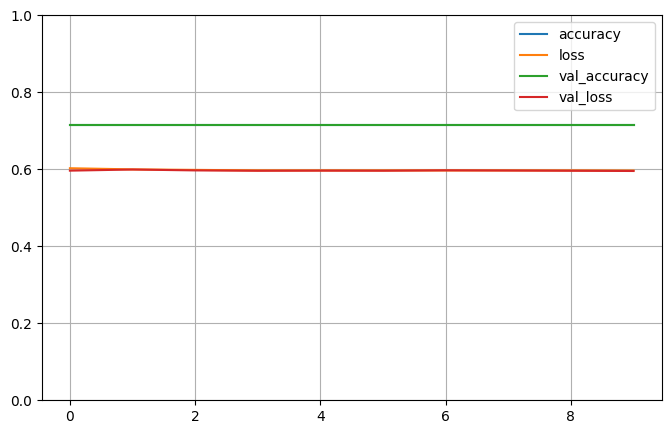

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data_frame = pd.DataFrame(history.history)
data_frame.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
score = base_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]:.2f}")

Test accuracy: 0.72


In [24]:
def predict_sentiment(review_text):
    text = review_text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)

    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_length)

    prediction = base_model.predict(padded)[0][0]
    return f"{'Positive' if prediction >= 0.5 else 'Negative'} (Probability: {prediction:.2f})"

sample_review = "The food was great."
print(f"Review: {sample_review}")
print(f"Sentiment: {predict_sentiment(sample_review)}")

Review: The food was great.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Sentiment: Positive (Probability: 0.71)


In [25]:
model = Sequential([Embedding(input_dim=max_features, output_dim = 64),Bidirectional(LSTM(128, activation='tanh', return_sequences=True)),
                    Bidirectional(LSTM(64, activation='tanh', return_sequences=False)), Dense(1, activation='sigmoid')])

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train,epochs= 5,batch_size=32,validation_data=(X_val, y_val),verbose=1)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 42s 195ms/step - accuracy: 0.7113 - loss: 0.6147 - val_accuracy: 0.7156 - val_loss: 0.5971
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 42s 199ms/step - accuracy: 0.7149 - loss: 0.5989 - val_accuracy: 0.7156 - val_loss: 0.5967
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 46s 227ms/step - accuracy: 0.7139 - loss: 0.5989 - val_accuracy: 0.7156 - val_loss: 0.5963
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 36s 200ms/step - accuracy: 0.7068 - loss: 0.6044 - val_accuracy: 0.7156 - val_loss: 0.5973
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - accuracy: 0.7149 - loss: 0.5988 - val_accuracy: 0.7156 - val_loss: 0.5958


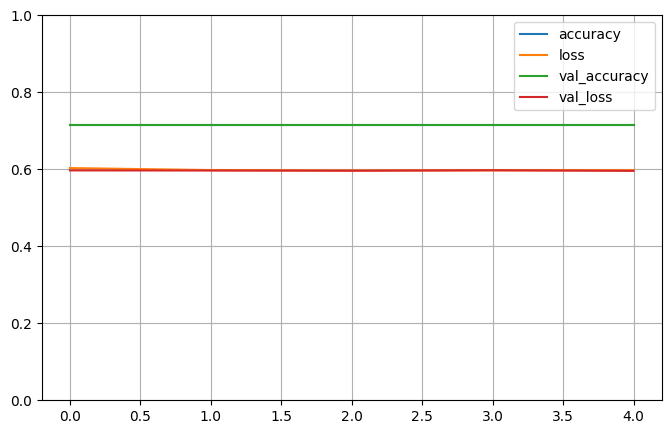

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

data_frame = pd.DataFrame(history.history)
data_frame.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]:.2f}")

Test accuracy: 0.72
